# "Capital Bikes Share Project"

1. Import the required libraries

In [1327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [1328]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [1329]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

2. Read and understand the data

In [1330]:
bikes = pd.read_csv("uci_edu_day.csv" , sep=",")

In [1331]:
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1332]:
bikes.drop('instant', axis = 1, inplace = True) 
# we drop the column instant as we have our own index and additional index not required.

In [1451]:
bikes.head(5)

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
0,0,0,0,0,6,0,0.363625,0.805833,0.160446,985,1,0,0,0,1
1,0,0,0,0,0,0,0.353739,0.696087,0.248539,801,1,0,0,0,1
2,0,0,0,0,1,1,0.189405,0.437273,0.248309,1349,1,0,0,0,0
3,0,0,0,0,2,1,0.212122,0.590435,0.160296,1562,1,0,0,0,0
4,0,0,0,0,3,1,0.229270,0.436957,0.186900,1600,1,0,0,0,0


In [1334]:
bikes.shape
# The dataframe has 730 rows and 15 columns

(731, 15)

In [1335]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [1336]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 3.Exploratory Data Analysis (EDA)
3.1 Check for missing values

In [1337]:
bikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

***

 3.2 Null values

Fixing columns and data types

In [1338]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Extract day from dteday column

In [1339]:
f = lambda x : x.split("-")[0]

# f = lambda x : x.split("-")[0]   ... in order to extract the year

In [1340]:
bikes["dteday"] = bikes["dteday"].apply(f)

In [1341]:
bikes.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1342]:
bikes.tail(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Assign names to values of season column

In [1343]:
def seasn(x):
    if x==1:
        return("spring")
    elif x == 2:
        return("summer")
    elif x == 3:
        return("fall")
    else:
        return("winter")

In [1344]:
bikes["season"] = bikes["season"].apply(seasn)

In [1345]:
bikes[["season"]].head(3)  # Check if conversion is proper

,season
0,spring
1,spring
2,spring


Assign names to values of weathersit column

In [1346]:
def wsit(x):
    if x==1:
        return("clear")
    elif x == 2:
        return("misty")
    elif x == 3:
        return("light_rain")
    else:
        return("heavy_rain")

In [1347]:
bikes["weathersit"] = bikes["weathersit"].apply(wsit)

In [1348]:
bikes[["weathersit"]].head()  # Check if conversion is proper

,weathersit
0,misty
1,misty
2,clear
3,clear
4,clear


In [1349]:
bikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011,spring,0,1,0,6,0,misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011,spring,0,1,0,0,0,misty,0.363478,0.353739,0.696087,0.248539,131,670,801


3.3 Univariate Analysis

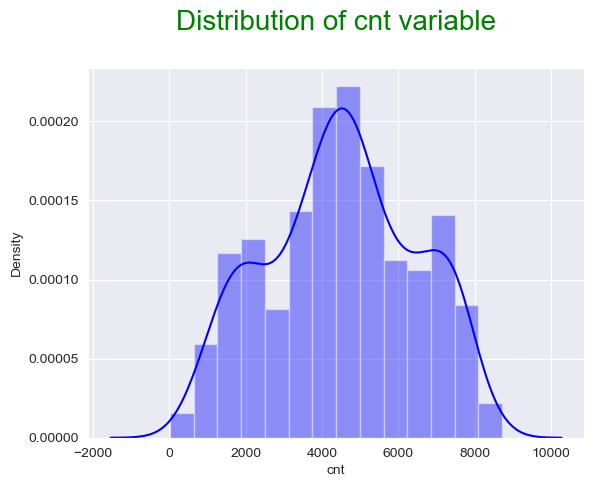

In [1350]:
# Analyse cnt variable
sns.distplot(bikes["cnt"], color="blue")
plt.title("Distribution of cnt variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

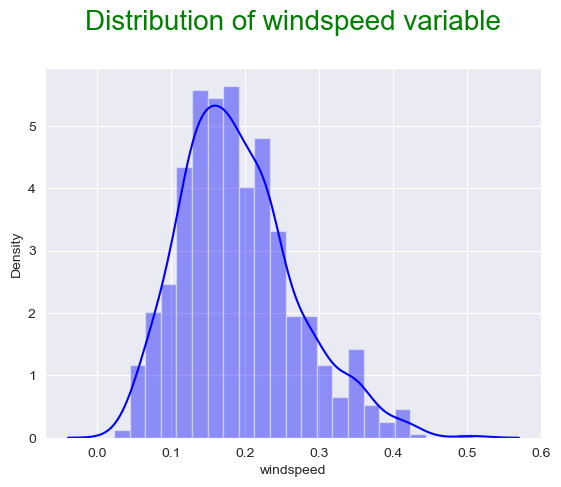

In [1351]:
# Analyse windspeed variable
sns.distplot(bikes["windspeed"], color="blue")
plt.title("Distribution of windspeed variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

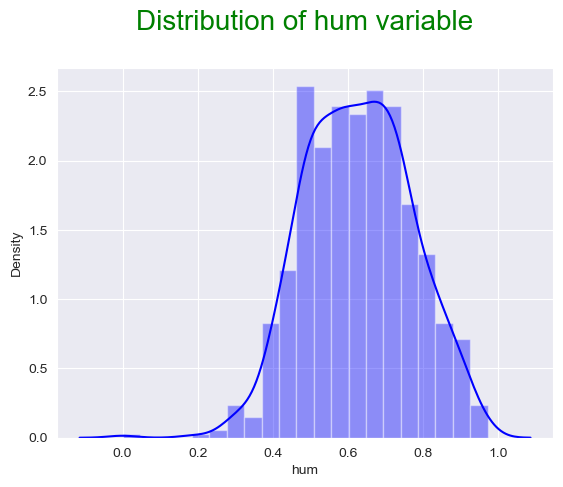

In [1352]:
# Analyse hum variable
sns.distplot(bikes["hum"], color="blue")
plt.title("Distribution of hum variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

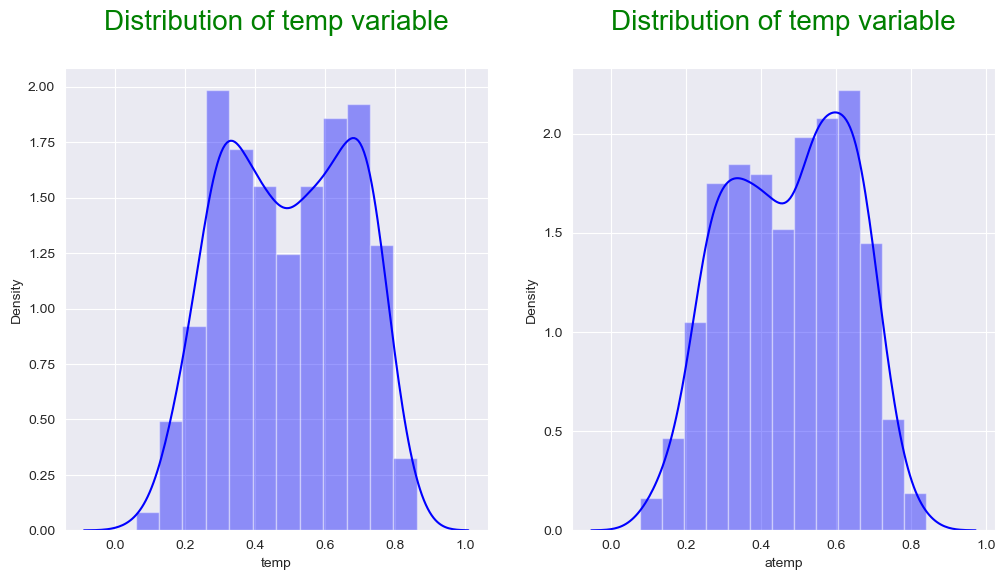

In [1353]:
# Analyse temp and atemp variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(bikes["temp"], color="blue")
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.distplot(bikes["atemp"], color="blue")
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

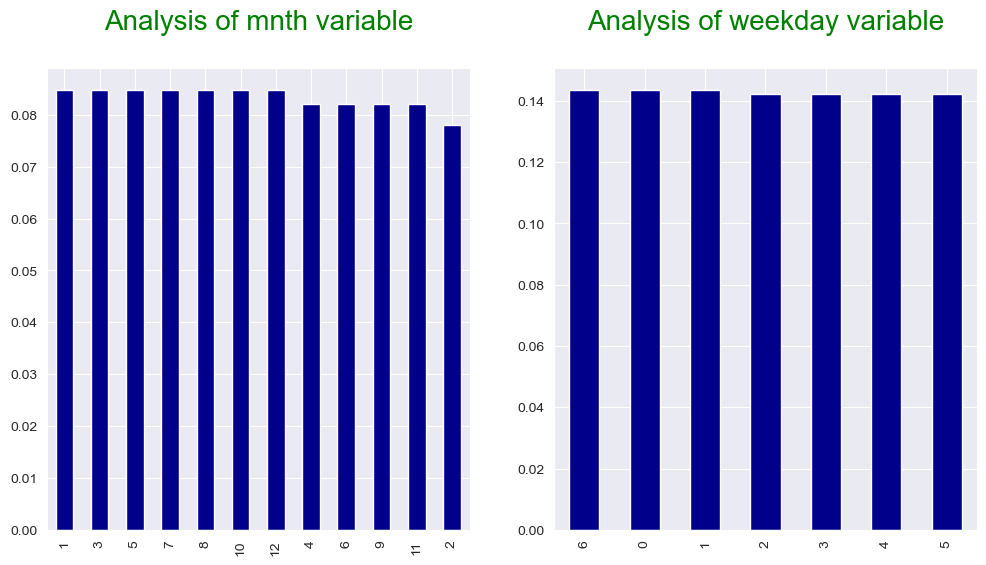

In [1354]:
# Analyse mnth and weekday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["mnth"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weekday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

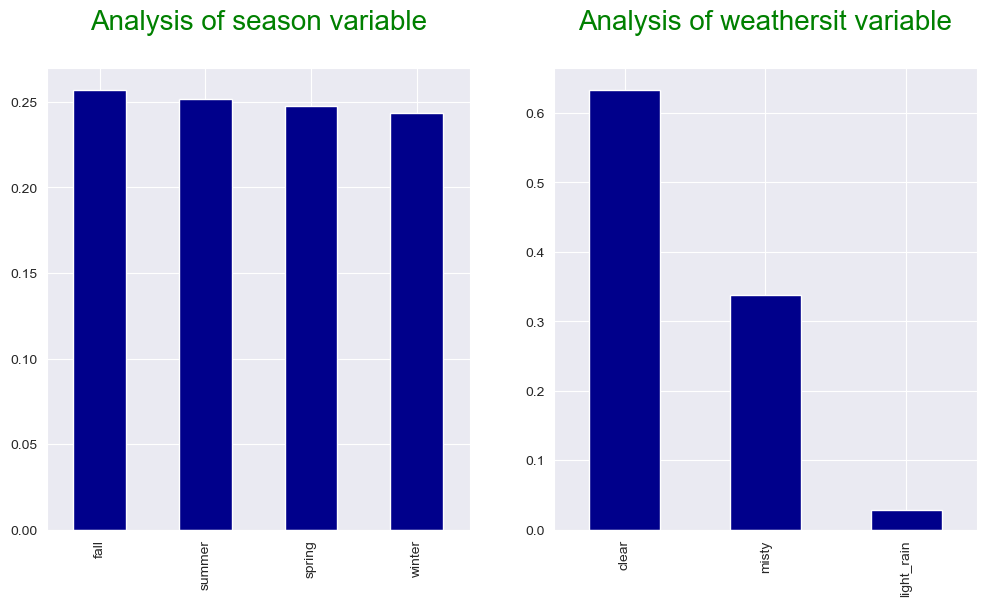

In [1355]:
# Analyse season and weathersit variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["season"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weathersit"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

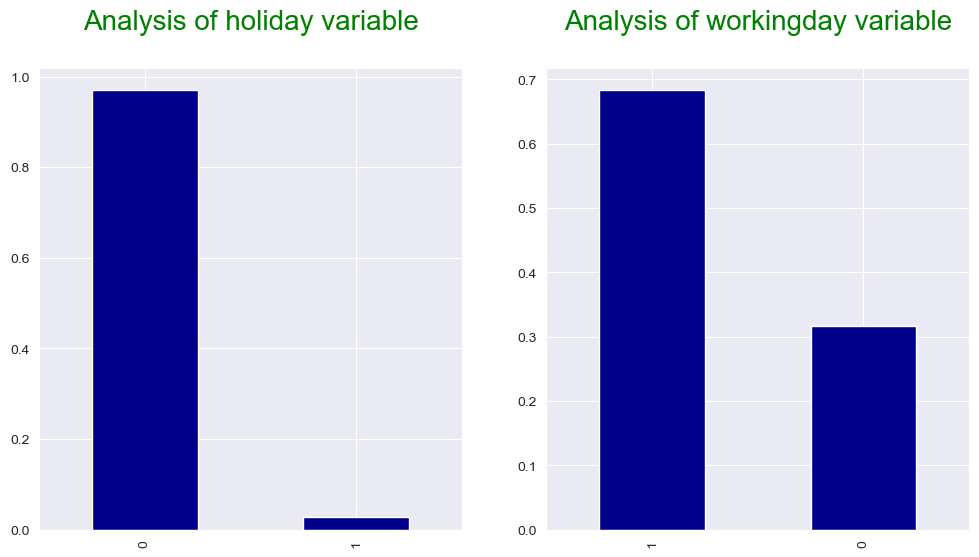

In [1356]:
# Analyse holiday and workingday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["holiday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of holiday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["workingday"].value_counts(normalize=True).plot.bar(color="darkblue")
plt.title("Analysis of workingday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

3.4 Bivariate Analysis

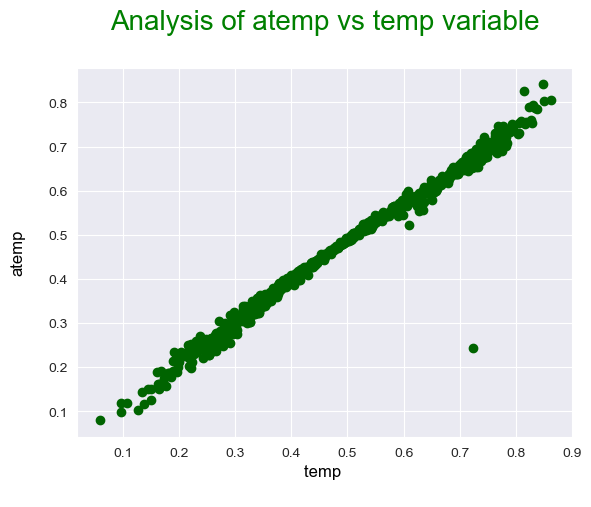

In [1357]:
# Scatter plot of atemp vs temp variable
plt.scatter(bikes["temp"], bikes["atemp"], color="darkgreen")
plt.title("Analysis of atemp vs temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("temp \n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("atemp\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [1358]:
bikes.groupby("season")["cnt"].sum()

season
fall      1061129
spring     471348
summer     918589
winter     841613
Name: cnt, dtype: int64

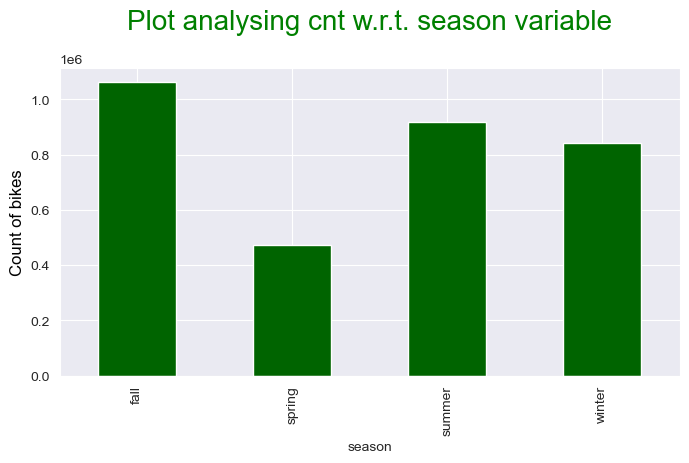

In [1359]:
# cnt w.r.t. season

plt.figure(figsize= (8,4))
bikes.groupby("season")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

***

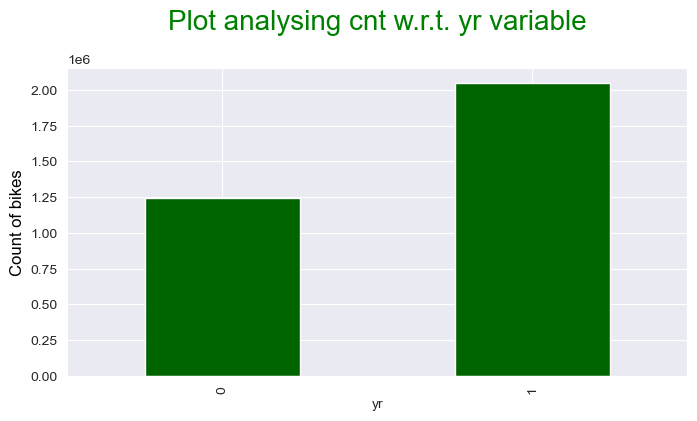

In [1360]:
# cnt w.r.t. yr

plt.figure(figsize= (8,4))
bikes.groupby("yr")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. yr variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

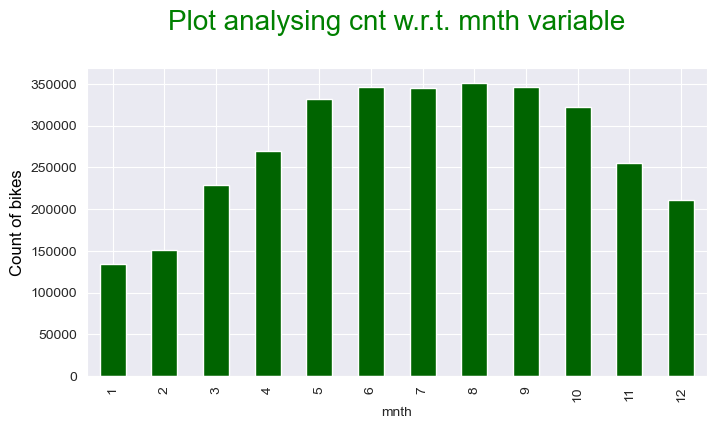

In [1361]:
# cnt w.r.t. mnth

plt.figure(figsize= (8,4))
bikes.groupby("mnth")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

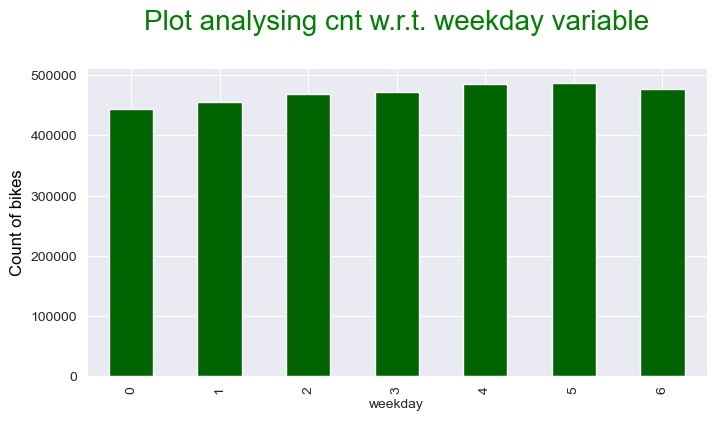

In [1362]:
# cnt w.r.t. weekday

plt.figure(figsize= (8,4))
bikes.groupby("weekday")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

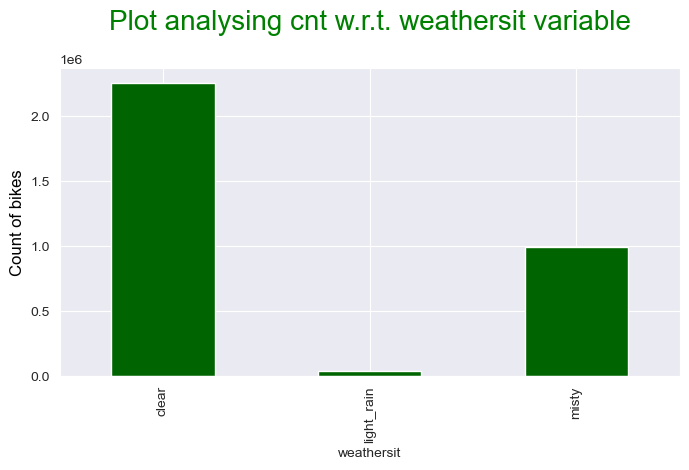

In [1363]:
# cnt w.r.t. weathersit

plt.figure(figsize= (8,4))
bikes.groupby("weathersit")["cnt"].sum().plot.bar(color="darkgreen")
plt.title("Plot analysing cnt w.r.t. weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

3.5 Multivariate Analysis

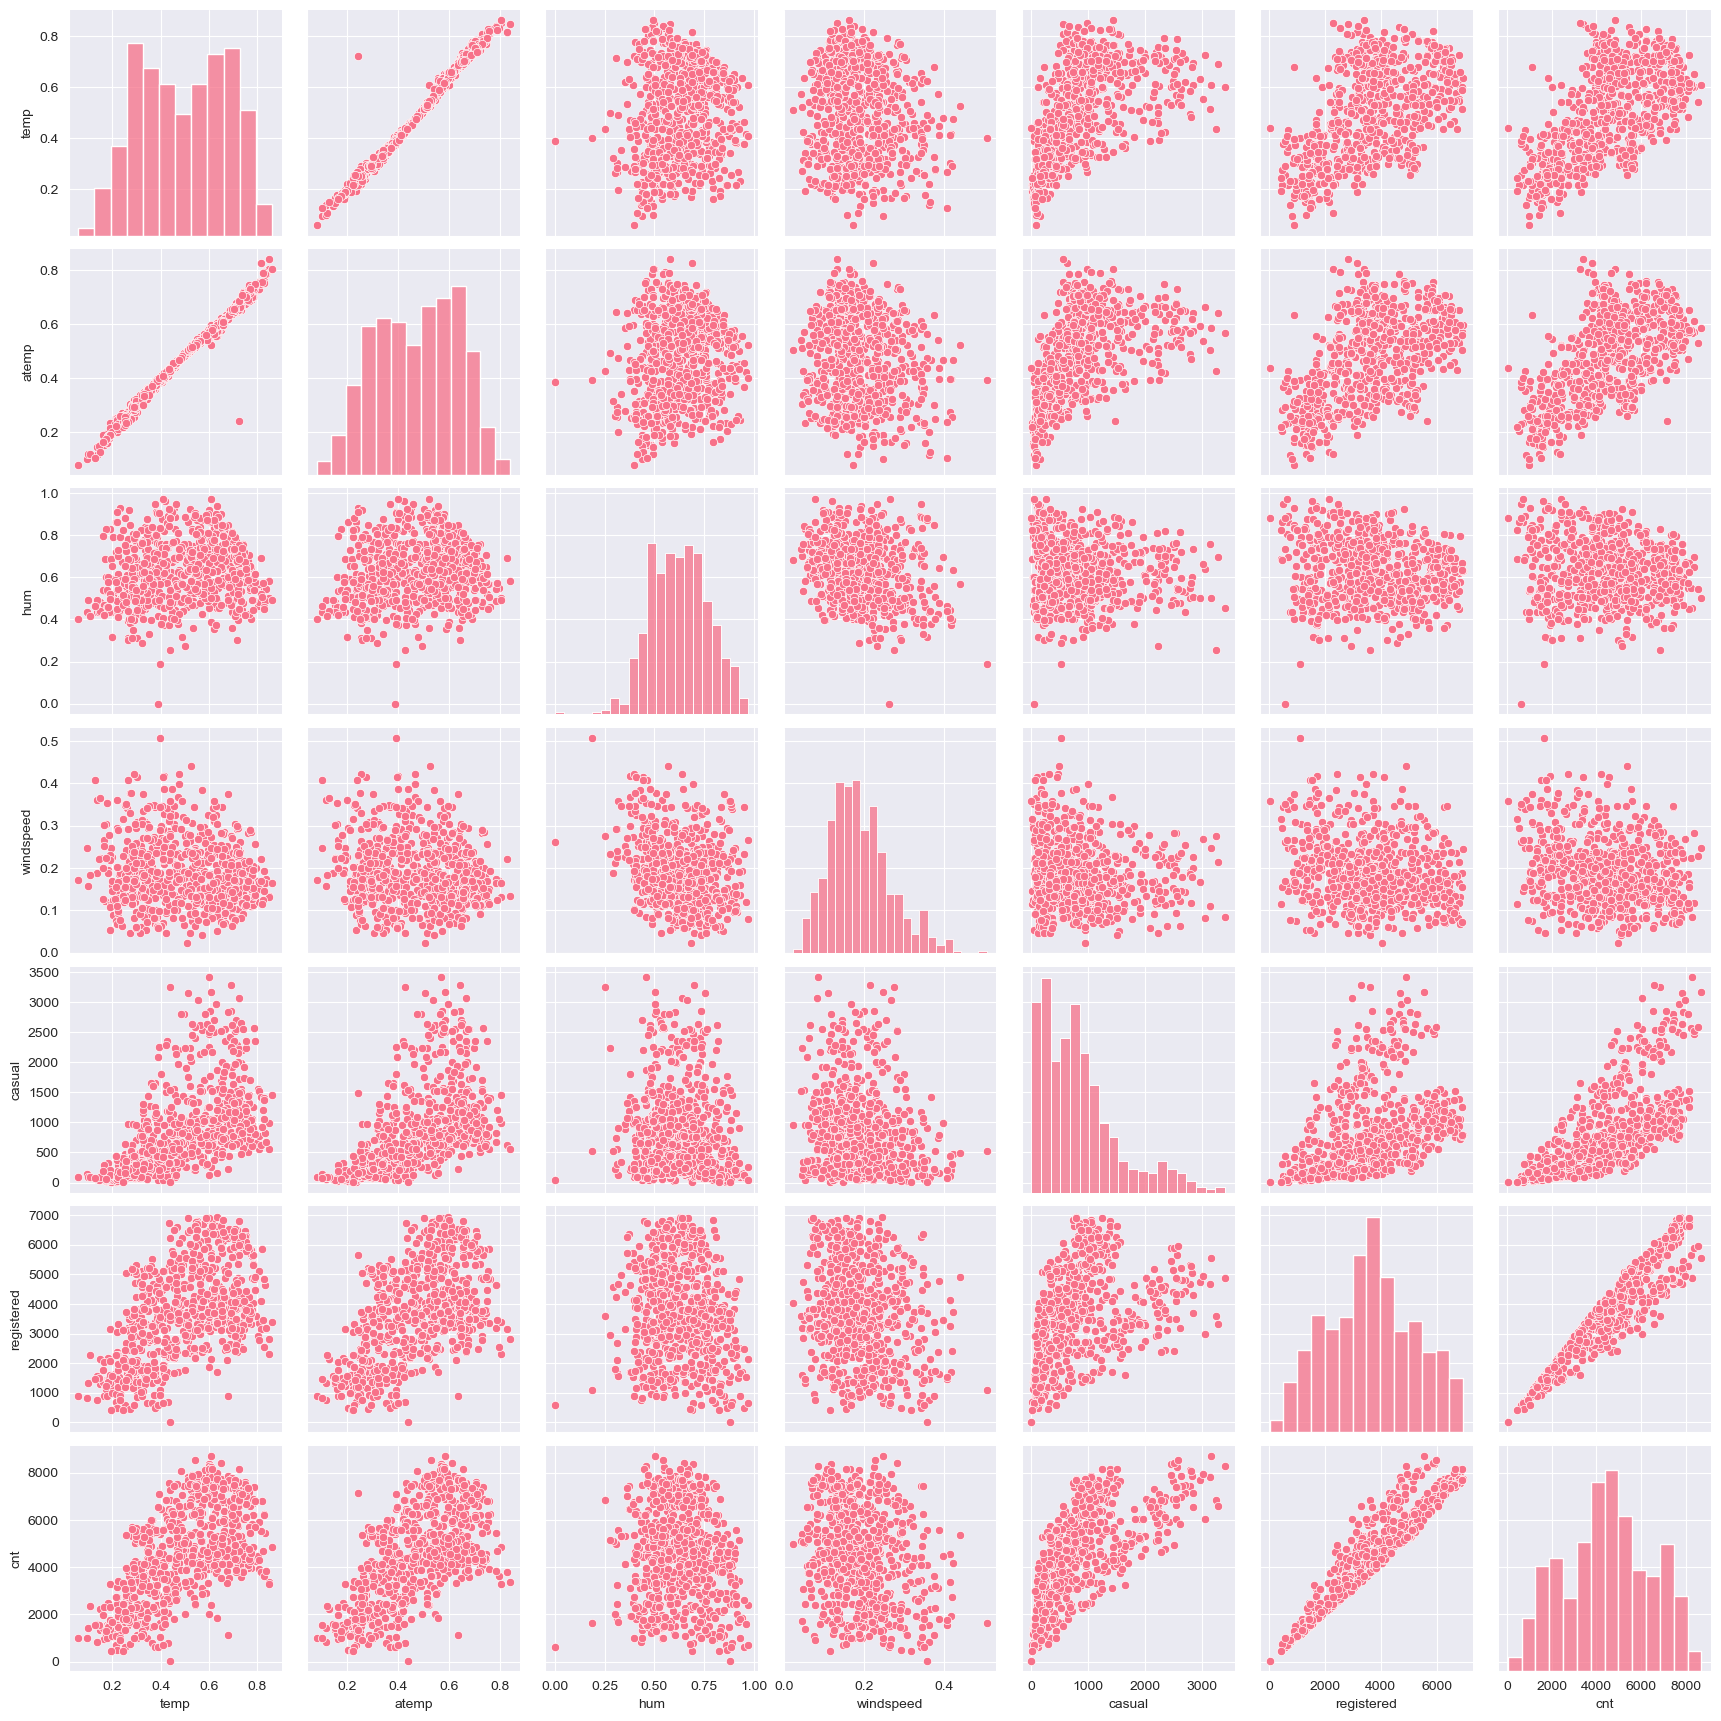

In [1364]:
# Pair plot of our data variables


sns.pairplot(data=bikes, vars=["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"])
plt.show()


### ***(...)

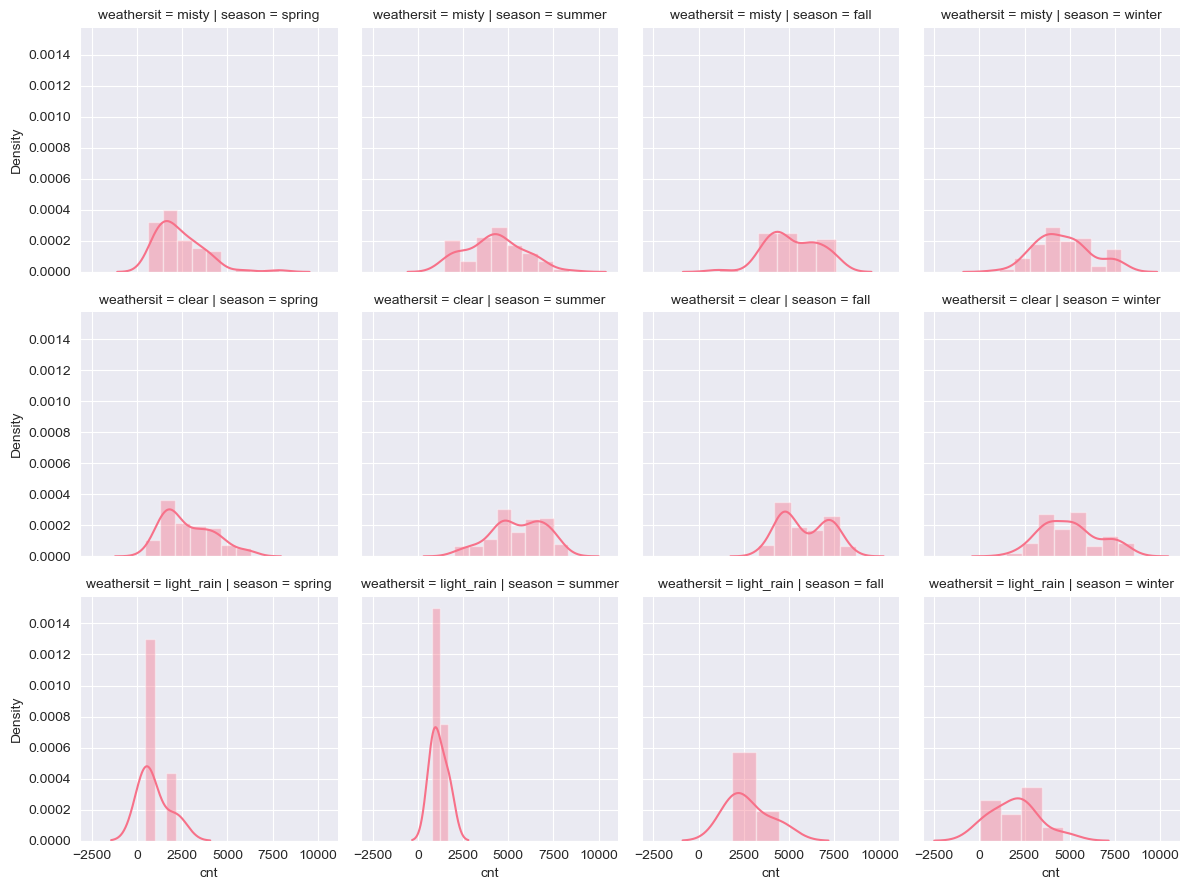

In [1365]:
# FacetGrid plot of cnt w.r.t. weathersit and season

sns.FacetGrid(bikes, col = 'season', row = 'weathersit').map(sns.distplot, 'cnt')
plt.show()

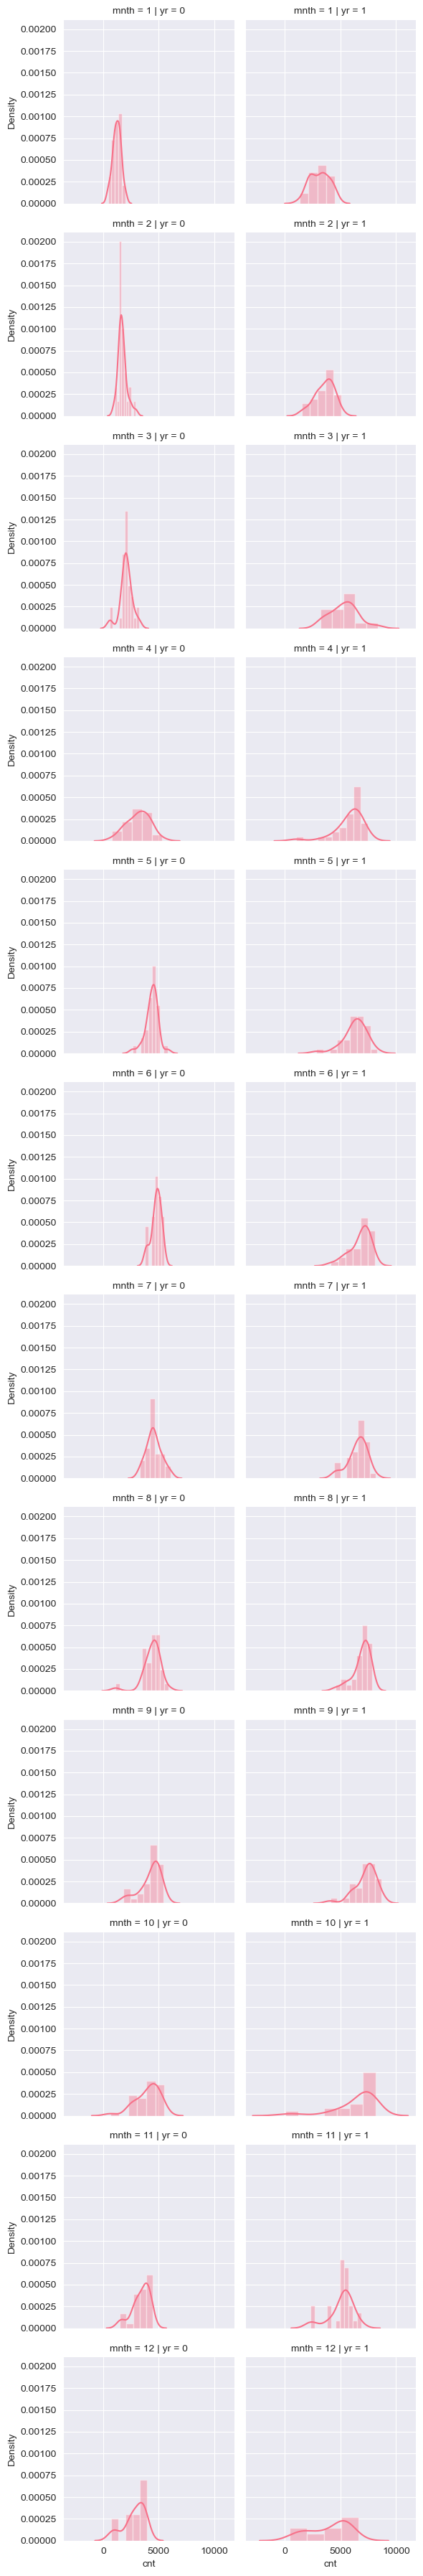

In [1366]:
# FacetGrid plotof cnt w.r.t. yr and mnth

sns.FacetGrid(bikes, col = 'yr', row = 'mnth').map(sns.distplot, 'cnt')
plt.show()

###### Using the seaborn library in Python to create a grid of distribution plots (histograms) for the 'cnt' variable in your dataset, grouped by the values of 'yr' (year) and 'mnth' (month) variables.

###### The code step by step:

###### sns.FacetGrid(bikes, col='yr', row='mnth'): This line creates a FacetGrid object from the seaborn library. It takes the 'bikes' DataFrame as the data source and specifies that the grid will have columns based on the 'yr' variable and rows based on the 'mnth' variable. This means that the resulting grid will have different plots for each combination of year and month.

###### .map(sns.distplot, 'cnt'): This line maps the distribution plot (sns.distplot) function to each subplot in the FacetGrid. It specifies that the 'cnt' variable should be plotted on the x-axis of each histogram. The map function applies the specified plotting function to each subplot in the grid.

###### plt.show(): This line displays the grid of distribution plots using the plt.show() function from the matplotlib library. It shows the generated plot on the screen.

###### In summary, the code generates a grid of histograms, where each histogram represents the distribution of the 'cnt' variable for different combinations of year and month. This can be useful for visualizing the distribution of the 'cnt' variable across different time periods.

***Inferences from EDA :
1. Bikes demand is more in 2011 as compared to 2012.
2. Bikes demand is more from months July to September months, on an average.
3. Bikes demand is more from Thursday to Sunday, on an average.
4. Bikes demand is more in clear weather.

### 4. Linear Regression Model building

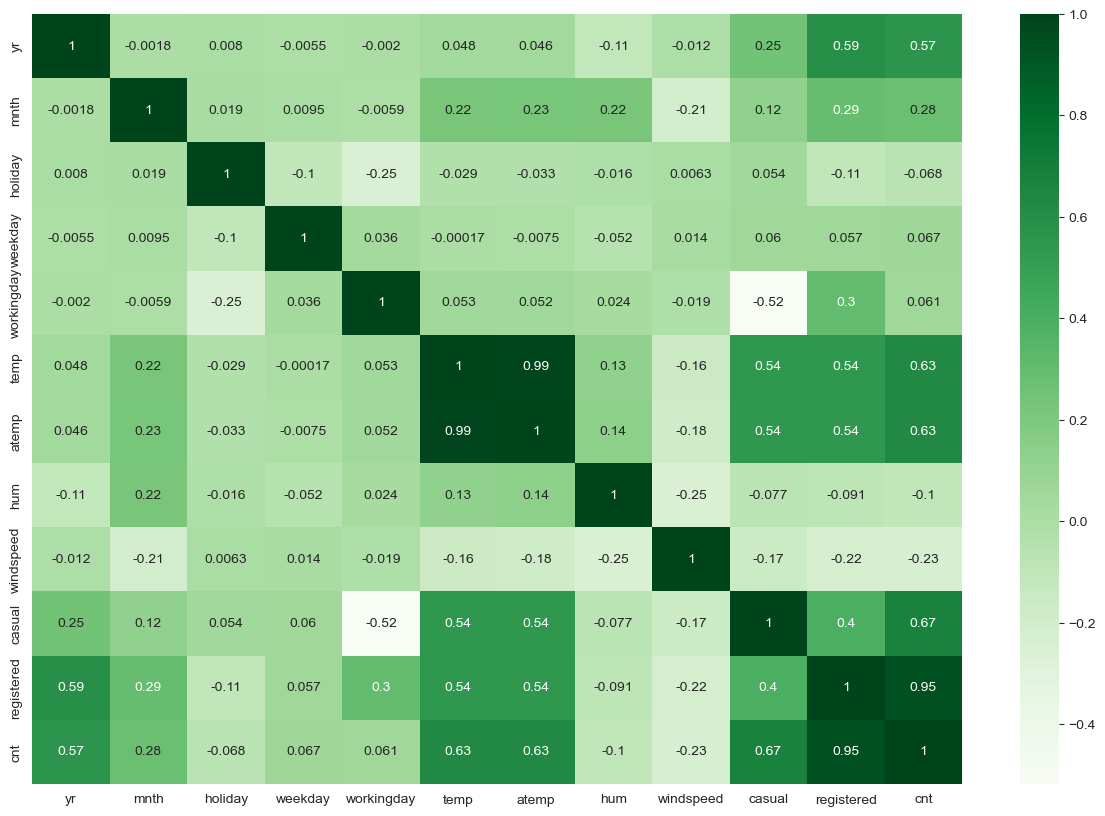

In [1367]:
# Heatmap for correlation of variables

plt.figure(figsize=(15,10))
sns.heatmap(bikes.corr(), cmap = "Greens", annot = True)
plt.show()

...temp and atemp have high correlation. From bivariate analysis we have seen that they are just two variables representing simliar data. Also registered and cnt have high correlation. cnt column is just total of casual and registered columns and it is our target variable. So we drop temp, casual and registered columns from our data.